In [17]:
# 일부만 할당된 GPU 메모리를 실행하는 동안 필요한만큼 늘릴 수 있도록 설정함
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [18]:
# 모델 학습 시 불필요한 출력을 끄도록 함 (waning)

tf.logging.set_verbosity(tf.logging.ERROR)

In [46]:
import numpy as np
from pandas import Series,DataFrame
np.random.seed(777)

# 1. 데이터 준비

In [20]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [73]:
print(X_train.shape)

print(y_train.shape)

print(X_test.shape)

print(y_test.shape)

    


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [23]:
print(X_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


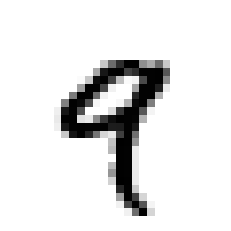

label:  9


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

digit = X_train[4]
label = y_train[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.axis('off')
plt.show()
print('label: ', label)

In [70]:
print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

# 숫자 5를 식별하는 분류기 만들기 

In [75]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [8]:
print(y_test_5)

[False False False ... False  True False]


# 2. 데이터 전처리

훈련을 시작하기 전에 데이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 0과 1 사이로 스케일을 조정합니다. 예를 들어, 앞서 우리의 훈련 이미지는 [0, 255] 사이의 값인 uint8 타입의 (60000, 28, 28) 크기를 가진 배열로 저장되어 있습니다. 이 데이터를 0과 1 사이의 값을 가지는 float32 타입의 (60000, 28 * 28) 크기의 배열로 바꿉니다.

In [84]:
X_train = X_train.reshape((60000, 28*28))
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test.astype('float32') / 255

In [81]:
X_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

# 3. 네트워크 정의 + 컴파일

In [82]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(32, input_shape=(28*28,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1, activation='softmax'))

model.compile(loss = 'binary_crossentropy', #'mse'
             optimizer = 'sgd',
             metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 26,209
Trainable params: 26,209
Non-trainable params: 0
_________________________________________________________________


# 4. 모델 학습

In [87]:
hist = model.fit(X_train, y_train_5, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 6s 93us/step - loss: 0.0216 - acc: 0.9934


In [12]:
loss, acc = model.evaluate(X_train, y_train_5, verbose=0)
print(loss)
print(acc)

0.10070061321208874
0.96795


# 5. 분류 결과 분석

### - 혼동 행렬(confusion matrix)

In [102]:
from tensorflow.keras.utils import to_categorical

y_pred_5 = model.predict(X_test).ravel()     #1차원으로 만듬
print(y_pred_5)

y_pred_5 = y_pred_5 > 0.5
print(y_pred_5)
print(y_test_5)

[3.1411648e-04 5.4249167e-04 4.4730306e-04 ... 3.5762787e-07 9.9733365e-01
 1.0013580e-05]
[False False False ... False  True False]
[False False False ... False  True False]


In [107]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_5, y_pred_5) # pred는 value로 전달
print(cm)

print(sum(y_test_5))

[[9086   22]
 [  70  822]]
892


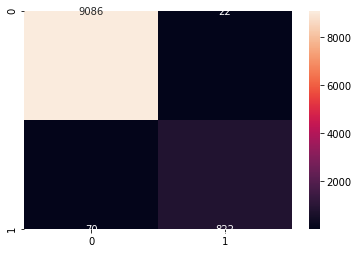

In [105]:
import pandas as pd
import seaborn as sns

df_cm = pd.DataFrame(cm)

heatmap = sns.heatmap(df_cm, annot=True, fmt='d')


In [109]:
import numpy as np

y_pred_5 = model.predict(X_test).ravel()

print(y_pred_5)
print(y_test_5)

[3.1411648e-04 5.4249167e-04 4.4730306e-04 ... 3.5762787e-07 9.9733365e-01
 1.0013580e-05]
[False False False ... False  True False]


### - Precision-Recall 커브(curve)

[0.37228715 0.37202505 0.37218045 ... 1.         1.         1.        ]
[1.         0.99887892 0.99887892 ... 0.00224215 0.00112108 0.        ]
[0.00103891 0.00104016 0.00104249 ... 0.9999842  0.9999877  0.9999892 ]
2390
2390
2389
10000


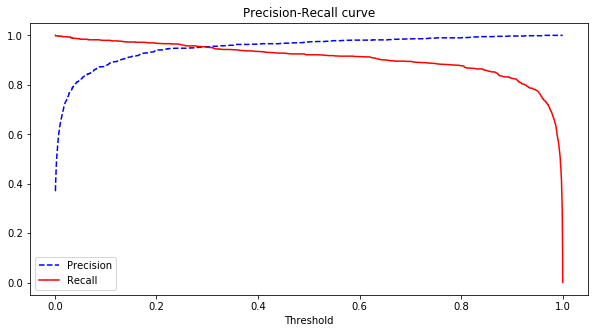

In [110]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test_5, y_pred_5) # pred 인자는 score(probability) 값으로 전달
print(precisions)
print(recalls)
print(thresholds)
print(len(precisions))                   
print(len(recalls))
print(len(thresholds))
print(len(y_test_5))

plt.figure(figsize=(10,5))
plt.title('Precision-Recall curve')
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'r-', label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.show()

# ↑ Precision 과 Recall 이 교차하는 점이 F-1 score 값이 높음 ,  최적의 Threshold 값은 교차하는 지점

# Precision과 Recall 값은 서로 반대 됨

### - ROC 커브(curve)

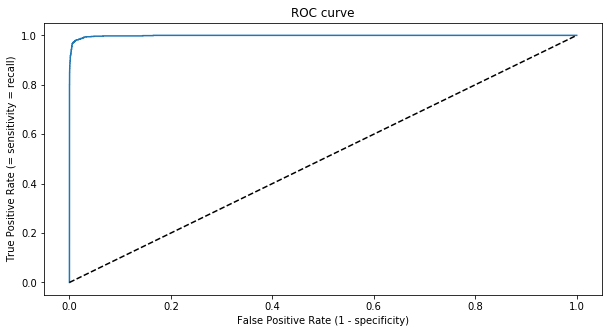

In [116]:
from sklearn.metrics import roc_curve

"""TPR : True Positive Rate (=민감도, true accept rate)
1인 케이스에 대해 1로 예측한 비율.(암환자를 진찰해서 암이라고 진단 함)

FPR :  False Positive Rate (=1-특이도, false accept rate)
0인 케이스에 대해 1로 잘못 예측한 비율.(암환자가 아닌데 암이라고 진단 함)

"""


fpr, tpr, thresholds = roc_curve(y_test_5, y_pred_5)

plt.figure(figsize=(10,5))                              
plt.title('ROC curve')
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
# plt.xlim(0,1)
# plt.ylim(0,1)
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (= sensitivity = recall)')
plt.show()

In [117]:
from sklearn.linear_model import Perceptron

perceptron = Sequential()
perceptron.add(Dense(1, input_shape=(28*28,), activation='sigmoid'))
perceptron.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['acc'])
perceptron.fit(X_train, y_train_5,
              epochs = 1)

Epoch 1/1
60000/60000 [==============================] - 5s 79us/step - loss: 0.1926 - acc: 0.9277


In [118]:
y_perceptron = perceptron.predict(X_test)
print(y_perceptron)

[[0.02428934]
 [0.14216971]
 [0.04596239]
 ...
 [0.0247201 ]
 [0.09285015]
 [0.00266281]]


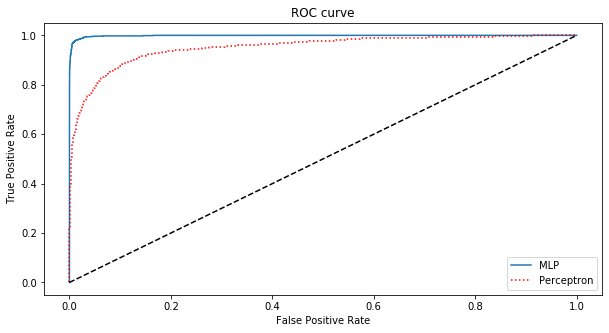

In [114]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(y_test_5, y_pred_5)
fpr2, tpr2, thresholds2 = roc_curve(y_test_5, y_perceptron)

plt.figure(figsize=(10,5))
plt.title('ROC curve')
plt.plot(fpr1, tpr1, label='MLP')
plt.plot(fpr2, tpr2, 'r:', label='Perceptron')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [115]:
from sklearn.metrics import roc_auc_score

auc1 = roc_auc_score(y_test_5, y_pred_5)
auc2 = roc_auc_score(y_test_5, y_perceptron)
print('AUC of MLP :', auc1)
print('AUC of Perceptron :', auc2)

AUC of MLP : 0.9987422972166586
AUC of Perceptron : 0.9513444544883422
